In [36]:
import numpy as np
import matplotlib.pyplot as plt

def lambda_sum(w, lambd):
    return np.mean(lambd * w ** 2) / 2

class ActivationManager():
    def activate(self, z):
        pass

    def derivate(self, a):
        pass

    def cost(self, predictions, truth, w=None, lambd=None):
        pass


class SigmoidActivator(ActivationManager):
    def activate(self, z):
        return 1 / (1 + np.exp(-z))

    def derivate(self, a):
        return a * (1-a)

    def cost(self, predictions, truth, w=None, lambd=None):
        # if np.any(f == 1) or np.any(f == 0):
        # return "NAN"
        a = truth * np.log(predictions)
        b = (1 - truth) * np.log(1 - predictions)
        result = -np.mean(a+b)
        if w and lambd:
            result += lambda_sum(w, lambd)
        return result

class LinearActivator(ActivationManager):
    def activate(self, z):
        return z

    def cost(self, predictions, truth, w=None, lambd=None):
        result = np.mean((predictions - truth)**2) / 2
        if w and lambd:
            result += lambda_sum(w, lambd)
        return result

    def derivate(self, a):
        return 1


training_data = np.array([
    [0, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 1]
])
x_train = training_data[:, 0:3]
y_train = training_data[:, 3:]

np.random.seed(1)
w1 = 2 * np.random.random((3, 5)) - 1
b1 = 2 * np.random.random(5) - 1
w2 = 2 * np.random.random((5, 1)) - 1
b2 = 2 * np.random.random(1) - 1
costs = []


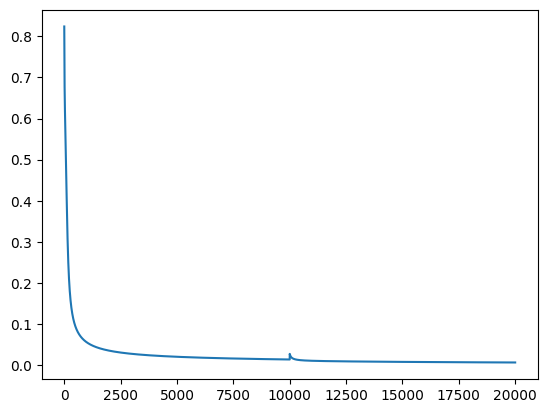

0.006481865247540963


In [38]:
activator = SigmoidActivator()
ALPHA = 1
for i in range(10000):
    z1 = np.matmul(x_train, w1) + b1
    a1 = activator.activate(z1)
    z2 = np.matmul(a1, w2) + b2
    a2 = activator.activate(z2)
    m = len(a2)

    e2 = a2 - y_train
    g2 = e2 * activator.derivate(a2)
    e1 = np.matmul(g2, w2.T)
    g1 = e1 * activator.derivate(a1)

    gw2 = np.matmul(a1.T, g2) / m
    gw1 = np.matmul(x_train.T, g1) / m

    gb2 = np.mean(g2, axis=0)
    gb1 = np.mean(g1, axis=0)

    w2 -= gw2*ALPHA
    w1 -= gw1*ALPHA
    b2 -= gb2*ALPHA
    b1 -= gb1*ALPHA

    costs.append(activator.cost(a2, y_train))
# 0.01118877008834417
plt.plot(costs)
plt.show()
print(costs[-1])
